In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**(1) Data Description:**

**"Players.csv"**
- 197 observations 
- 8 variables 

experience:
- factor
- Minecraft experience either Pro, Veteran, Amateur, Regular or Beginner

subscribe:
- logical
- receiving emails from PlaiCraft (TRUE) or not (FALSE)

hashedEmail:
- character
- player's email used to sign up, coded for anonymity

played_hours:
- double
- total number of hours played on PlaiCraft server

gender:
- factor
- gender identity either Male, Female, Non-binary, Two-Spiritied, Prefer not to say or Other 

age:
- integer
- player's age

individualId:
- character
- player's unique code for researchers’ use
  
organizationName:
- character
- name of player's organization or None, if not part of one
  


**“sessions.csv”**
- 1536 observations
- 5 variables 

hashedEmail
- same as in "players.csv"
   
start_time
- character
-  date (dd/mm/yyyy) and time (24 hours) when a session begins 
  
end_time
- character
- date (dd/mm/yyyy) and time (24 hours) when a session finishes 
  
original_start_time
- double
- scheduled start time (UNIX timestamp format)

original_end_time
- double
- scheduled end time (UNIX timestamp format) 


Issues: 
- "session.csv" is untidy as date and time are in the same column in both
"start_time" and "end_time"
- Missing data for "individualId" and "organizationName"

Potential issues: 
- Quality of played hours may be inconsistent across players and sessions
- Self-reported data may be incorrect due to misunderstandings, or an unwillingness to answer truthfully 
- Different interpretation of experience causing inconsistent answers  



**(2) Question:**

“Which experience level provides the most data measured by longest playing time per session using KNN classification?"

- Add new play_time_diff column by mutating data frame by subtracting start_time by end_time in "session.csv" to measure the longest playing time per session (response variable). 
- "experience" of "players.csv" data file will be used to classify experience level (explanatory variable)
- Using the "hashedEmail" variable found in both data files, the separate data files will be linked together to classify the "play_time_diff" data points to an experience level. 

**(3) Exploratory Data Analysis and Visualization**

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


Pro,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


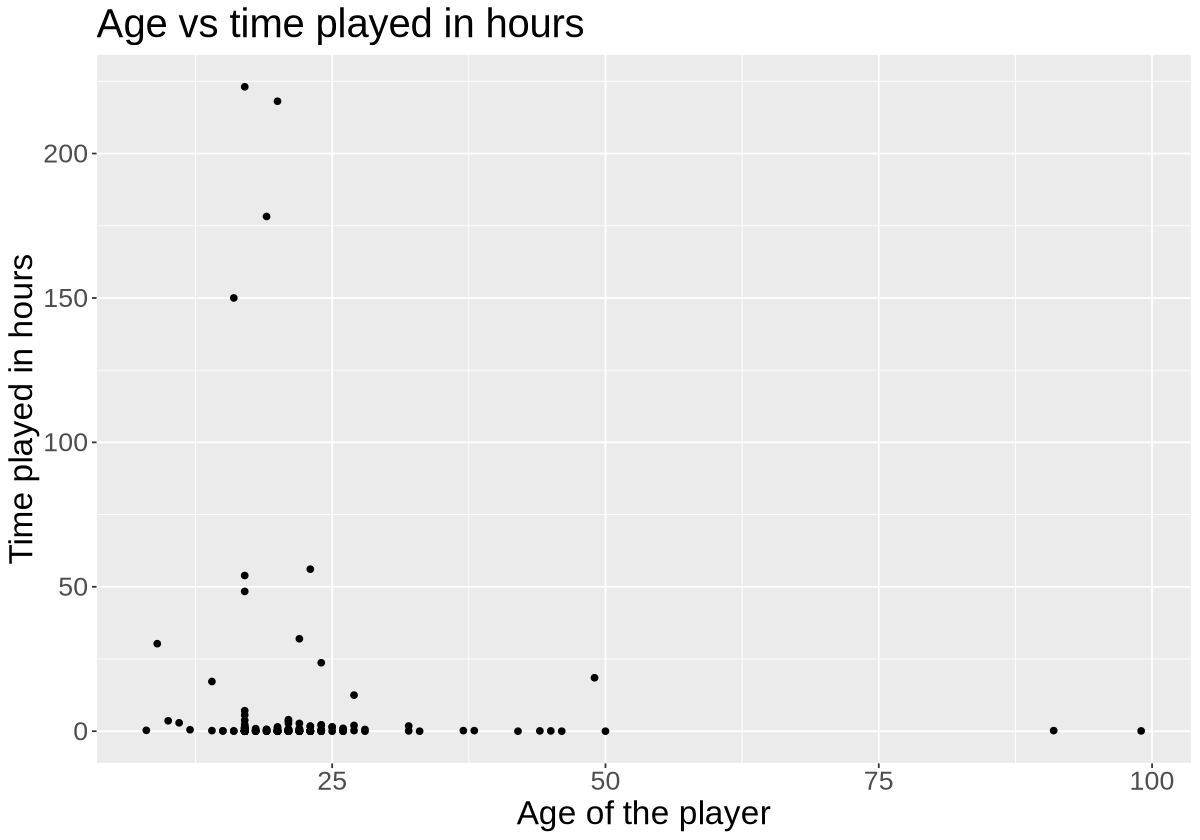

In [18]:
url_players <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url_sessions <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"

players <- read_csv(url_players)
head(players)

             
#pivot_longer(tbl, column_range, names_to = ..., values_to = ...)
head(players_resigned)





players_plot <- players |> 
                ggplot(aes(x = age, y = played_hours))+
                geom_point()+
                labs(x = "Age of the player",
                     y = "Time played in hours",
                     color = "Minecraft experience level")+
                 ggtitle("Age vs time played in hours")+
                 theme(text = element_text(size = 20))
players_plot



- "player.csv" is in a tidy format, and no wrangling is required.
- "session.csv" was not in a tidy format. Thus, date and time of "start_time" and "end_time" were both separated into two new columns. 

**First plot:** 
- Data for the average play time is clustered together, making the plot hard to interpret 

**Second plot:**
- start_time and end_time data are both character data types and need to be converted into a numeric data type. 
- May be difficult as the time values are not “standard” numbers, especially if a player “crosses” a day within one session 



**(4) Methods and Plan**

Predict the experience level with KNN classification model

**Appropriate:**
- Response variable, "experience", is categorical data
- Can be used on large data sets 
- Works well for a variety of relationships
- Visualization of the data is unneeded

**Assumes:**
- Players self-selected the correct experience level
- All players with the same experience level behaves in a similar way

**Limitations:**
- Poor extrapolation 
- Slow with large data sets
- Large amount of predictors may weaken performance

**Compare and select:**
- Number of neighbors with the lowest RMSPE value is selected 
- 1 - 1000 neighbors will be tested, skipping by 10

**Process data:**
- Data is split into 70% training and 30% testing after being fully wrangled 
- Training data is further split into 10 groups to perform cross-validation 
